# Import Libraries

In [1]:
import numpy as np #linear algebra calculation
import pandas as pd #dataset manipulation
pd.set_option('display.max_columns', None)

# Visualization tools
import matplotlib
import matplotlib.pyplot as plt
	
import matplotlib.patches as mpatches
import seaborn as sns

#waring ignore
import warnings
warnings.filterwarnings('ignore')

In [2]:
print('Numpy Version:', np.__version__)
print('Pandas Version:', pd.__version__)
print('Matplotlib Version:', matplotlib.__version__)
print('Seaborn Version:', sns.__version__)

Numpy Version: 1.21.5
Pandas Version: 1.4.2
Matplotlib Version: 3.5.1
Seaborn Version: 0.11.2


# Import Dataset

In [3]:
df_raw = pd.read_csv('hotel_bookings_data.csv')

#overview
df_raw.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
103434,City Hotel,0,7,2018,February,52,20,0,4,2,1.0,0,Breakfast,Kabupaten Tangerang,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,100.73,0,0,Check-Out
96976,City Hotel,0,183,2018,November,37,8,0,3,2,0.0,0,Breakfast,Kota Yogyakarta,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,44.0,NaN,0,Family,110.00,0,1,Check-Out
69124,City Hotel,1,197,2019,July,21,25,2,4,2,0.0,0,Breakfast,Kabupaten Magelang,Direct,Direct,0,0,0,0,No Deposit,14.0,NaN,0,Personal,129.60,0,1,Canceled
40658,City Hotel,1,1,2017,October,32,5,0,1,1,0.0,0,Breakfast,Kota Jakarta Selatan,Corporate,Corporate,0,0,0,0,No Deposit,NaN,38.0,0,Family,6.00,0,0,Canceled
51165,City Hotel,0,136,2018,July,20,14,2,2,2,0.0,0,Breakfast,Kota Semarang,Online TA,TA/TO,0,0,0,2,No Deposit,9.0,NaN,0,Personal,113.05,0,1,Check-Out


# Data Understanding

In [4]:
#dataset info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

The dataset consists of 119,390 rows and 29 columns. Every column has a proper data type

In [5]:
#missing values
df_raw.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [6]:
#missing values %
cols_w_null = [x for x in df_raw.columns if df_raw[x].isnull().sum() > 0]

for i in cols_w_null:
    print(f'Column {i} : {np.round(df_raw[i].isnull().sum()*100/df_raw.shape[0], 4)}% missing values')

Column children : 0.0034% missing values
Column city : 0.4087% missing values
Column agent : 13.6862% missing values
Column company : 94.3069% missing values


In [7]:
#descriptive statistics (Numericals)
num_cols = [x for x in df_raw.columns if df_raw[x].dtypes != 'O']
cat_cols = [x for x in df_raw.columns if x not in num_cols]

df_raw[num_cols].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
#Categorical columns unique values
for i in cat_cols:
    print(df_raw[i].value_counts())

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64
Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743

# Data Preprocessing

## Handling Missing Values

In [9]:
# Copy dataset
df_no_null = df_raw.copy()

# Filling the missing values in column 'children', 'agent', 'company' with 0
df_no_null['children'].fillna(0, inplace = True)
df_no_null['agent'].fillna(0, inplace = True)
df_no_null['company'].fillna(0, inplace = True)

In [10]:
# Filling the missing values in column 'city' with 'Unknown'
df_no_null['city'].fillna('Unknown', inplace = True)

In [11]:
#recheck the missing values
df_no_null.isnull().sum().sum()

0

## Drop Duplicates

In [12]:
# copy dataset
df_no_dup = df_no_null.copy()

# drop duplicates
df_no_dup = df_no_dup.drop_duplicates()

## Feature Engineering

In [13]:
# Copy dataset
df_fe = df_no_dup.copy()

# Change the value 'Undefined' in 'meal' column with 'No Meal'
df_fe['meal'] = df_fe['meal'].apply(lambda x: x if x != 'Undefined' else 'No Meal')
df_fe['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

In [14]:
# extract new column 'total_visitor'
df_fe['total_visitor'] = df_fe['adults'] + df_fe['children'] + df_fe['babies']

#descriptive statistics
df_fe['total_visitor'].describe()

count    86129.000000
mean         2.029816
std          0.796360
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         55.000000
Name: total_visitor, dtype: float64

In [15]:
#drop the records with total visitor = 0
df_fe = df_fe[df_fe['total_visitor'] > 0]

#drop the records with total stay duration = 0
df_fe = df_fe[(df_fe['stays_in_weekend_nights'] > 0) | (df_fe['stays_in_weekdays_nights'] > 0)]

# Final dataset
df_analize = df_fe.copy()

In [16]:
#clean dataset overview
df_analize.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_visitor
14037,Resort Hotel,0,113,2017,October,31,1,18,42,1,0.0,0,Dinner,Unknown,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,110.50,0,3,Check-Out,1.0
80729,City Hotel,1,77,2017,February,52,26,2,3,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,1,0,0,No Deposit,9.0,0.0,0,Contract,108.72,0,1,Canceled,2.0
118121,City Hotel,0,195,2019,October,32,12,2,1,2,1.0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,148.50,0,1,Check-Out,3.0
15862,Resort Hotel,0,264,2019,October,32,7,1,5,2,0.0,0,Breakfast,Kabupaten Kepulauan Seribu,Online TA,TA/TO,1,0,1,1,No Deposit,240.0,0.0,0,Personal,204.00,1,2,Check-Out,2.0
71741,City Hotel,1,97,2019,September,28,11,0,3,2,0.0,0,Breakfast,Kota Jakarta Utara,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,150.00,0,2,Canceled,2.0


# Monthly Booking Analysis

## Monthly Booking Count Table

In [17]:
#aggregation

df_monthly_book = df_analize.groupby(['arrival_date_year', 'arrival_date_month', 'hotel']).agg({'is_canceled' : 'count'}).reset_index()
df_monthly_book['arrival_date_month'] = df_monthly_book['arrival_date_month'].apply(lambda x: x[:3])
df_monthly_book = df_monthly_book.rename(columns = {'is_canceled' : 'bookings'})

void_dict = {
    'arrival_date_year' : [2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 
                           2017, 2019, 2019, 2019, 2019],
    'arrival_date_month' : ['Mar', 'Mar', 'Apr', 'Apr', 'May', 'May', 'Jun', 'Jun', 'Jul', 'Jul', 'Aug', 'Aug',
                           'Jan', 'Jan', 'Feb', 'Feb'],
    'hotel' : ['City Hotel', 'Resort Hotel','City Hotel', 'Resort Hotel', 'City Hotel', 'Resort Hotel', 'City Hotel', 'Resort Hotel',
              'City Hotel', 'Resort Hotel', 'City Hotel', 'Resort Hotel','City Hotel', 'Resort Hotel', 'City Hotel', 'Resort Hotel'],
}

df_void = pd.DataFrame(void_dict)

df_monthly_book = pd.concat([df_monthly_book, df_void], axis = 0)

month_dict = {'Jan' : 1, 
              'Feb' : 2, 
              'Mar' : 3, 
              "Apr" : 4, 
              "May" : 5, 
              'Jun' : 6, 
              'Jul' : 7, 
              "Aug" : 8, 
              "Sep" : 9, 
              'Oct' : 10, 
              "Nov" : 11, 
              "Dec" : 12}

df_monthly_book['month_num'] = df_monthly_book['arrival_date_month'].map(month_dict)
df_monthly_book = df_monthly_book.sort_values(['arrival_date_year', 'month_num']).reset_index(drop = True)
df_monthly_book['month_year'] = df_monthly_book['arrival_date_month'] + ' ' + df_monthly_book['arrival_date_year'].apply(lambda x: str(x)[-2:])
df_monthly_book.head(20)

,arrival_date_year,arrival_date_month,hotel,bookings,month_num,month_year
0,2017,Jan,City Hotel,753.0,1,Jan 17
1,2017,Jan,Resort Hotel,831.0,1,Jan 17
2,2017,Feb,City Hotel,988.0,2,Feb 17
3,2017,Feb,Resort Hotel,923.0,2,Feb 17
4,2017,Mar,City Hotel,NaN,3,Mar 17
5,2017,Mar,Resort Hotel,NaN,3,Mar 17
6,2017,Apr,City Hotel,NaN,4,Apr 17
7,2017,Apr,Resort Hotel,NaN,4,Apr 17
8,2017,May,City Hotel,NaN,5,May 17
9,2017,May,Resort Hotel,NaN,5,May 17


In [18]:
df_monthly_book_city = df_monthly_book[(df_monthly_book['hotel'] == 'City Hotel')]
df_monthly_book_resort = df_monthly_book[(df_monthly_book['hotel'] == 'Resort Hotel')]

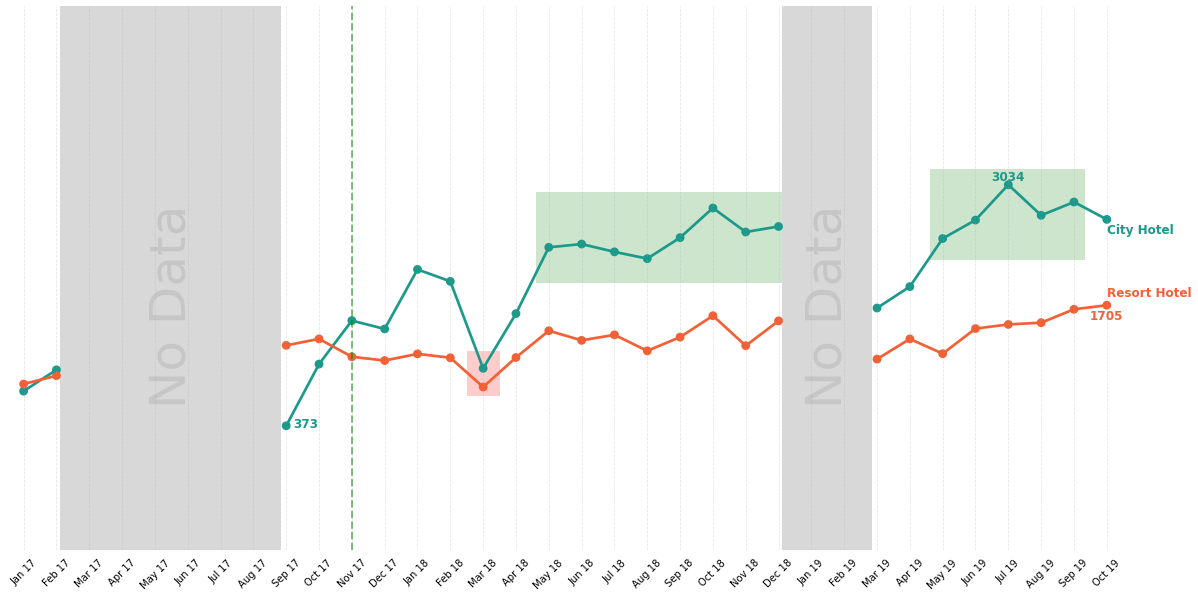

In [19]:
#visualization
fig, ax = plt.subplots(figsize = (20,10))

markers = ['o' if x != 0 else '' for x in df_monthly_book_city['bookings']]

left, bottom, width, height = (1.1, -1000, 6.75, 6000)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.3,
                        #color="purple",
                       #linewidth=2,
                       facecolor="grey")
plt.gca().add_patch(rect)

left2, bottom2, width2, height2 = (23.1, -1000, 2.75, 6000)
rect2=mpatches.Rectangle((left2,bottom2),width2,height2, 
                        #fill=False,
                        alpha=0.3,
                        #color="purple",
                       #linewidth=2,
                       facecolor="grey")
plt.gca().add_patch(rect2)

left3, bottom3, width3, height3 = (27.6, 2200, 4.75, 1000)
rect3=mpatches.Rectangle((left3,bottom3),width3,height3, 
                        #fill=False,
                        alpha=0.2,
                        #color="purple",
                       #linewidth=2,
                       facecolor="green")
plt.gca().add_patch(rect3)

left4, bottom4, width4, height4 = (15.6, 1950, 7.5, 1000)
rect4=mpatches.Rectangle((left4,bottom4),width4,height4, 
                        #fill=False,
                        alpha=0.2,
                        #color="purple",
                       #linewidth=2,
                       facecolor="green")
plt.gca().add_patch(rect4)

left5, bottom5, width5, height5 = (13.5, 700, 1, 500)
rect5=mpatches.Rectangle((left5,bottom5),width5,height5, 
                        #fill=False,
                        alpha=0.2,
                        #color="purple",
                       #linewidth=2,
                       facecolor="red")
plt.gca().add_patch(rect5)


# palette1 = ['grey' if x in ['Jan 17', 'Feb 17'] else 'blue' for x in df_monthly_book_city['month_year']]
# linestyles = ['-' for x in df_monthly_book_city['month_year']]

sns.pointplot(data = df_monthly_book_city, x = 'month_year', y = 'bookings', color = '#1b998b', markers= 'o', linewidth = .5, ax = ax)
sns.pointplot(data = df_monthly_book_resort, x = 'month_year', y = 'bookings', color = '#f46036', markers= 'o', ax = ax)
plt.grid(axis = 'x', alpha = 0.3, linestyle = '--')
plt.xticks(rotation = 45)
plt.ylim(-1000, 5000)

plt.text(4.5, 1700, s = 'No Data', rotation = 90,
        fontsize = 50, horizontalalignment = 'center',
        verticalalignment = 'center', color = 'grey', alpha = .2)

plt.text(24.5, 1700, s = 'No Data', rotation = 90,
        fontsize = 50, horizontalalignment = 'center',
        verticalalignment = 'center', color = 'grey', alpha = .2)

plt.text(33, 2500, s = 'City Hotel', weight = 700, 
        fontsize = 12, color = '#1b998b')
plt.text(33, 1800, s = 'Resort Hotel', weight = 700, 
        fontsize = 12, color = '#f46036')

plt.text(8.2, 350, s = '373', weight = 700, 
        fontsize = 12, color = '#1b998b')
plt.text(30, 3084, s = '3034', weight = 700, 
        fontsize = 12, color = '#1b998b', horizontalalignment = 'center')

plt.text(33, 1550, s = '1705', weight = 700, 
        fontsize = 12, color = '#f46036', horizontalalignment = 'center')

# background and frame
fig.patch.set_facecolor('#fff')
ax.set(frame_on = False)
plt.yticks([])
plt.xticks()
plt.ylabel('')
plt.xlabel('')
plt.tick_params(bottom = False)

#title
# plt.title('Tren Jumlah Pemesanan Hotel (Jan 17 - Oct 19)', fontsize = 25,
#          pad = 30, loc = 'left')

plt.axvline(x = 10, ymax = 4000, linewidth = 2, linestyle = '--',
           color = 'green', alpha = .5)

plt.show()

# Stay Duration x Cancelation

In [20]:
df_analize.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_visitor
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,107.0,0,0,Check-Out,2.0
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,0.0,0,Full Board,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,303.0,0.0,0,Personal,103.0,0,1,Check-Out,2.0


In [21]:
# Extract New Column 'total_stay_duration'
df_analize['total_stay_duration'] = df_analize['stays_in_weekdays_nights'] + df_analize['stays_in_weekend_nights']

In [22]:
# Descritive statistics of total_stay_duration
df_analize['total_stay_duration'].describe()

count    85378.000000
mean         3.665792
std          2.742289
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         69.000000
Name: total_stay_duration, dtype: float64

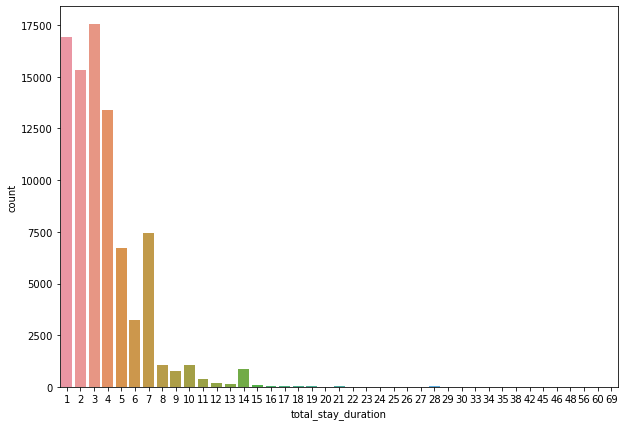

In [23]:
# Countplot of total_stay_duration
plt.figure(figsize = (10, 7))
sns.countplot(data = df_analize, x = 'total_stay_duration')
plt.show()

In [24]:
# Make group for total_stay_duration
def stay_group(x):
    if x > 14:
        return '>14'
    else:
        return str(x)

df_analize['total_stay_duration_group'] = df_analize['total_stay_duration'].apply(lambda x: stay_group(x))

In [25]:
# Aggregation

df_agg1 = df_analize.groupby(['hotel', 'total_stay_duration_group']).agg({'arrival_date_year': 'count', 'is_canceled' : 'sum'})
df_agg1 = df_agg1.reset_index()
df_agg1 = df_agg1.rename(columns = {'arrival_date_year' : 'total_books', 'is_canceled' : 'canceled_books'})
df_agg1['cancel_pct'] = df_agg1['canceled_books'] / df_agg1['total_books']
df_agg1['cancel_pct'] = df_agg1['cancel_pct'] * 100

df_agg1['order_idx'] = df_agg1['total_stay_duration_group'].apply(lambda x: 14 if x == '>14' else int(x)-1)
df_agg1 = df_agg1.sort_values('order_idx').reset_index(drop = True)

df_agg_1_city = df_agg1[df_agg1['hotel'] == 'City Hotel']
df_agg_1_city = df_agg_1_city.reset_index(drop = True)
df_agg_1_resort = df_agg1[df_agg1['hotel'] == 'Resort Hotel']
df_agg_1_resort = df_agg_1_resort.reset_index(drop = True)

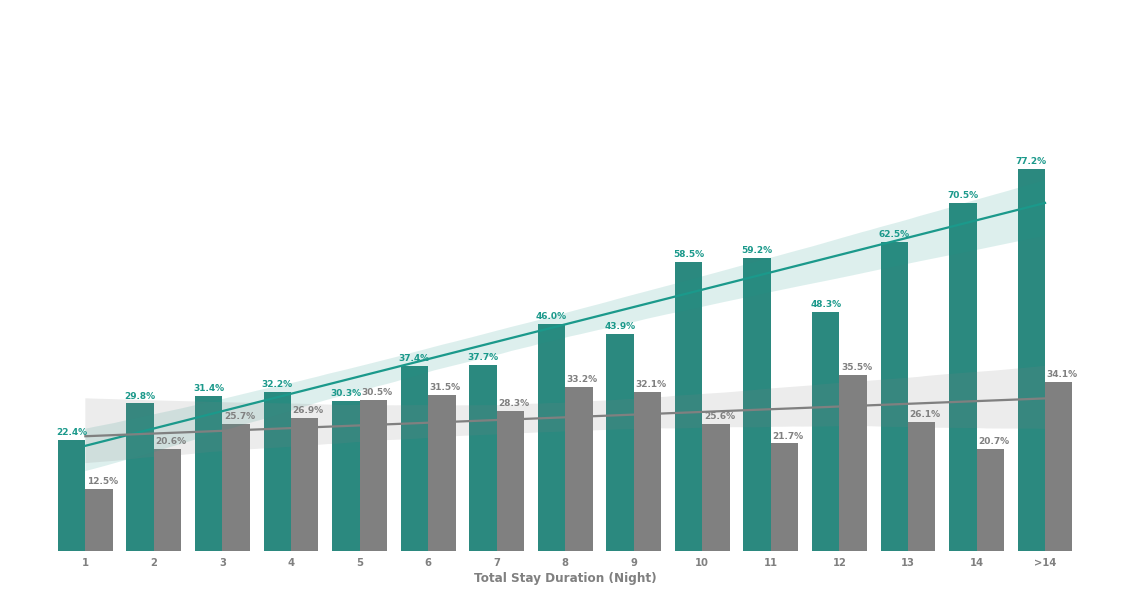

In [26]:
#visualization
fig, ax = plt.subplots(figsize = (20, 10))
sns.barplot(data = df_agg1, x = 'total_stay_duration_group', y = 'cancel_pct', hue = 'hotel', 
            palette = ['#1b998b', 'grey'], ax = ax)
sns.regplot(data = df_agg_1_city, x = 'order_idx', y = 'cancel_pct', scatter = None,
            color = '#1b998b', ax = ax)
sns.regplot(data = df_agg_1_resort, x = 'order_idx', y = 'cancel_pct', scatter = None,
           color = 'grey', ax = ax)

plt.legend([], [], frameon = False)

plt.ylim(0, 110)

# background and frame
fig.patch.set_facecolor('#fff')
ax.set(frame_on = False)
plt.yticks([])
plt.xticks(fontsize = 10, weight = 700, color = 'grey')
plt.ylabel('')
plt.xlabel('Total Stay Duration (Night)', fontsize = 12, weight = 700, color = 'grey')
plt.tick_params(bottom = False)

# label and annotation
city_annot = df_agg_1_city['cancel_pct']
resort_annot = df_agg_1_resort['cancel_pct']

for i in range(len(city_annot)):
    plt.text(i-.2, city_annot[i] + 1, s = f'{np.round(city_annot[i], 1)}%',
            horizontalalignment = 'center', fontsize = 9, weight = 700, 
            color = '#1b998b')
    
    plt.text(i+.25, resort_annot[i] + 1, s = f'{np.round(resort_annot[i], 1)}%',
            horizontalalignment = 'center', fontsize = 9, weight = 700, 
            color = 'grey')


plt.show()

# Lead Time x Cancelation

In [27]:
df_analize['lead_time'].describe()

count    85378.000000
mean        79.647567
std         85.517499
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        709.000000
Name: lead_time, dtype: float64

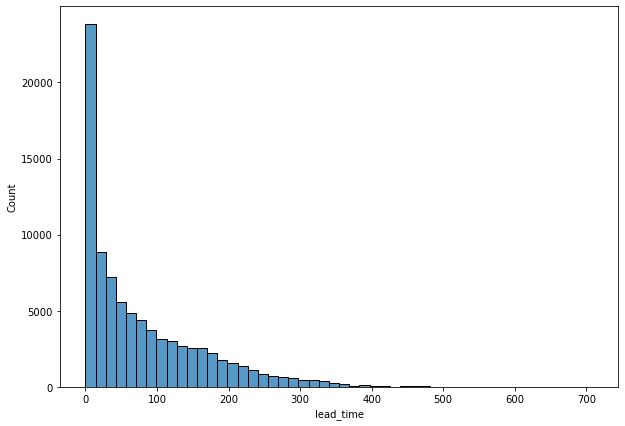

In [28]:
# histplot of lead_time
plt.figure(figsize = (10, 7))
sns.histplot(data = df_analize, x = 'lead_time', bins = 50)
plt.show()

In [29]:
# create category for lead_time
def lead_time_cat(x):
    if x <30:
        return '0-30'
    elif x <60:
        return '30-60'
    elif x <90:
        return '60-90'
    elif x <120:
        return '90-120'
    elif x <150:
        return '120-150'
    elif x <180:
        return '150-180'
    elif x <210:
        return '180-210'
    elif x <240:
        return '210-240'
    elif x <270:
        return '240-270'
    elif x <300:
        return '270-300'
    elif x <330:
        return '300-330'
    elif x <360:
        return '330-360'
    elif x <390:
        return '360-390'
    elif x <420:
        return '390-420'
    else:
        return '>420'

df_analize['lead_time_group'] = df_analize['lead_time'].apply(lambda x: lead_time_cat(x))

In [30]:
# Aggregation

df_agg2 = df_analize.groupby(['hotel', 'lead_time_group']).agg({'arrival_date_year': 'count', 'is_canceled' : 'sum'})
df_agg2 = df_agg2.reset_index()
df_agg2 = df_agg2.rename(columns = {'arrival_date_year' : 'total_books', 'is_canceled' : 'canceled_books'})
df_agg2['cancel_pct'] = df_agg2['canceled_books'] / df_agg2['total_books']
df_agg2['cancel_pct'] = df_agg2['cancel_pct'] * 100

df_agg2['order_idx'] = df_agg2['lead_time_group'].apply(lambda x: 450/30 if x == '>420' else int(x.split('-')[1])/30)
df_agg2 = df_agg2.sort_values('order_idx').reset_index(drop = True)

df_agg_2_city = df_agg2[df_agg2['hotel'] == 'City Hotel']
df_agg_2_city = df_agg_2_city.reset_index(drop = True)
df_agg_2_resort = df_agg2[df_agg2['hotel'] == 'Resort Hotel']
df_agg_2_resort = df_agg_2_resort.reset_index(drop = True)
df_agg2

,hotel,lead_time_group,total_books,canceled_books,cancel_pct,order_idx
0,City Hotel,0-30,19607,3806,19.411435,1.0
1,Resort Hotel,0-30,13677,1645,12.027491,1.0
2,Resort Hotel,30-60,4444,1286,28.937894,2.0
3,City Hotel,30-60,8808,2918,33.128974,2.0
4,City Hotel,60-90,6218,2129,34.239305,3.0
5,Resort Hotel,60-90,3078,957,31.091618,3.0
6,City Hotel,90-120,4745,1668,35.152792,4.0
7,Resort Hotel,90-120,2407,797,33.111757,4.0
8,City Hotel,120-150,3613,1324,36.645447,5.0
9,Resort Hotel,120-150,2037,694,34.069710,5.0


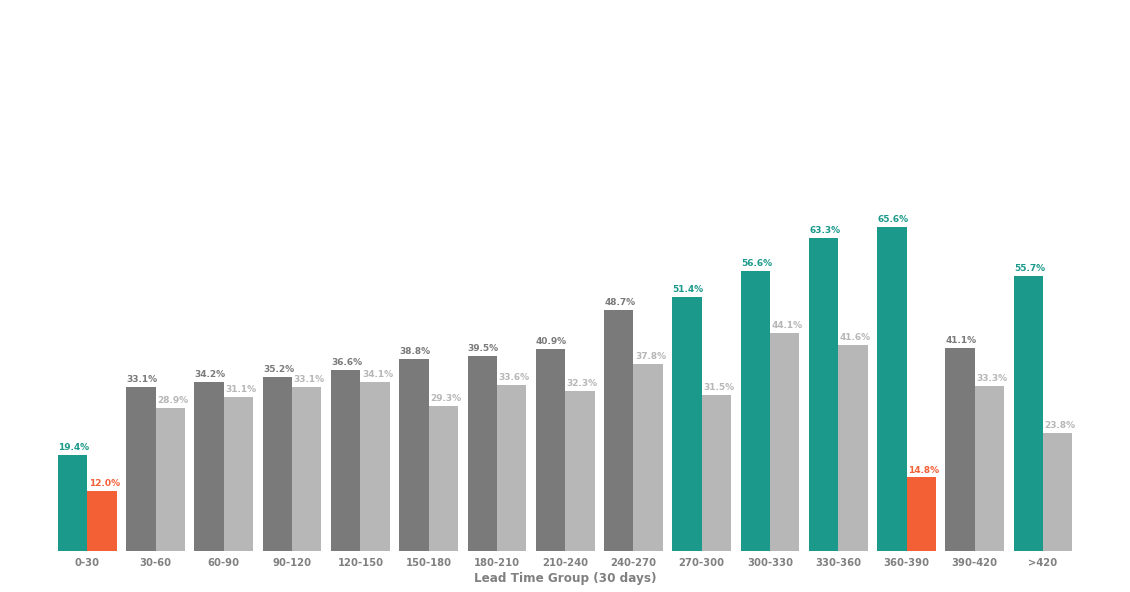

In [32]:
# Visualization

fig, ax = plt.subplots(figsize = (20, 10))

col1 = ['#1b998b' if (x < 20) | (x > 50) else '#7a7a7a' for x in df_agg_2_city['cancel_pct']]
col2 = ['#f46036' if x < 15 else '#b8b7b7' for x in df_agg_2_resort['cancel_pct']]

ax.bar(data = df_agg_2_city, x = 'lead_time_group', height = 'cancel_pct', align = 'edge', width = -0.43, color = col1)
ax.bar(data = df_agg_2_resort, x = 'lead_time_group', height = 'cancel_pct', align = 'edge', width = 0.43, color = col2)

plt.legend([], [], frameon = False)

plt.ylim(0, 110)

# background and frame
fig.patch.set_facecolor('#fff')
ax.set(frame_on = False)
plt.yticks([])
plt.xticks(fontsize = 10, weight = 700, color = 'grey')
plt.ylabel('')
plt.xlabel('Lead Time Group (30 days)', fontsize = 12, weight = 700, color = 'grey')
plt.tick_params(bottom = False)

# label and annotation
city_annot = df_agg_2_city['cancel_pct']
resort_annot = df_agg_2_resort['cancel_pct']

for i in range(len(city_annot)):
    if (city_annot[i] < 20) | (city_annot[i] > 50):
        plt.text(i-.2, city_annot[i] + 1, s = f'{np.round(city_annot[i], 1)}%',
                horizontalalignment = 'center', fontsize = 9, weight = 700, 
                color = '#1b998b')
    else:
        plt.text(i-.2, city_annot[i] + 1, s = f'{np.round(city_annot[i], 1)}%',
                horizontalalignment = 'center', fontsize = 9, weight = 700, 
                color = '#7a7a7a')
    
    if (resort_annot[i] < 15):
        plt.text(i+.25, resort_annot[i] + 1, s = f'{np.round(resort_annot[i], 1)}%',
                horizontalalignment = 'center', fontsize = 9, weight = 700, 
                color = '#f46036')
    else:
        plt.text(i+.25, resort_annot[i] + 1, s = f'{np.round(resort_annot[i], 1)}%',
                horizontalalignment = 'center', fontsize = 9, weight = 700, 
                color = '#b8b7b7')


plt.show()